# 2.3.3 Multiple Optimal Solutions

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1BFDdfYJiD3Bq9oxTzonnlAmGsTrEIgJP?usp=sharing)

Each of the problems that we have solved graphically had a unique optimal solution. The following example shows that it is possible for a linear programming problem to have multiple solutions that are all equally effective in achieving an objective. Consider the problem:


$$
\begin{align*}
\text{maximize} \quad & z = x_1 + 2x_2 \\
\text{subject to} \quad & -x_1 + x_2 \leq 2 \\
& x_1 + 2x_2 \leq 8 \\
& x_1 \leq 6 \\
& x_1, x_2 \geq 0 
\end{align*}
$$

The feasible region is shown in **Figure 2.3**.

The line representing the objective function ( $x_1 + 2x_2$ ) can be made tangent to the feasible region at the origin, but clearly ( $z$ ) is maximized by placing the line where the values of ( $x_1$) and ( $x_2$ ) are larger. Notice that the objective function line in this case is tangent to the feasible region not at a single extreme point, but rather along one of the boundaries of the feasible region.

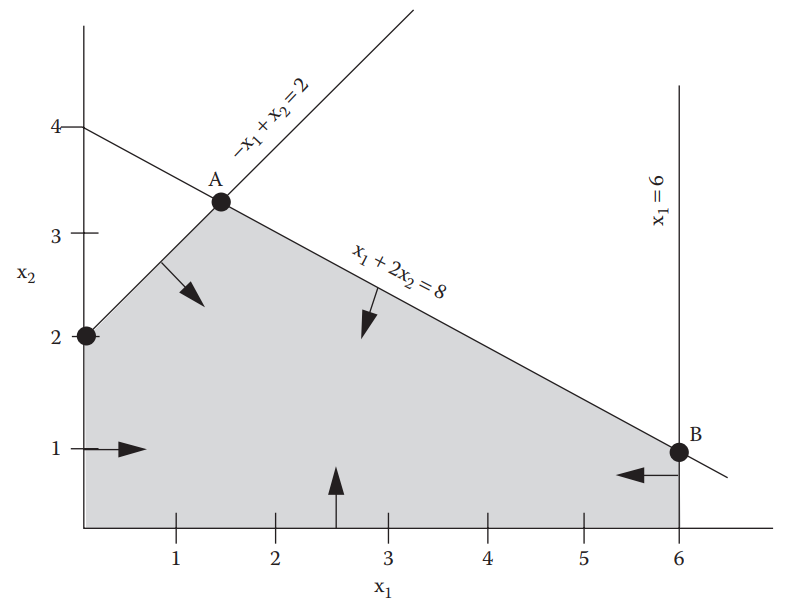
<br />

FIGURE 2.3
<br />

Multiple optimal solutions

The values

$$
z_A = z\left( \frac{4}{3}, \frac{10}{3} \right) = \frac{4}{3} + 2 \cdot \frac{10}{3} = 8
$$

and

$$
z_B = z(6, 1) = 6 + 2 \cdot 1 = 8
$$

correspond to optimal solutions at points A and B; moreover, all points on the line between extreme points A and B are also optimal. Therefore, ( $z^* = 8$ ) and the optimal solutions can be expressed as a set:

$$
\left\{ (x_1, x_2) \ \middle|\ \frac{4}{3} \leq x_1 \leq 6,\ x_2 = -\frac{1}{2}x_1 + 5 \right\}
$$

Such a situation may occur whenever the slope of the objective function line is the same as that of one of the constraints.

**Code Implementation**

In [1]:
def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_optimal_points(obj_type, a, b, constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)

    feasible_points = np.array(feasible_points)
    if feasible_points.size == 0:
        print("No feasible region found")
        return np.array([]), None

    obj_values = [a * x + b * y for x, y in feasible_points]
    optimal_index = np.argmax(obj_values) if obj_type == "maximize" else np.argmin(obj_values)
    optimal_point = feasible_points[optimal_index]
    return feasible_points, optimal_point

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(0, 10, 2000)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def graphical_method(obj_type, a, b, constraints):
    x_range = np.linspace(0, 16, 300)
    y_range = np.linspace(0, 10, 300)
    plt.figure(figsize=(8, 8))
    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points, optimal_point = find_optimal_points(obj_type, a, b, constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

    if optimal_point is not None:
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

    plt.xlim(0, 16)
    plt.ylim(0, 10)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc='upper right')
    plt.title(f"{obj_type.capitalize()} Objective Function")
    plt.grid(True)
    plt.show()

def solve_example():
    example = [
        ("maximize", 1, 2, [(-1, 1, 2, '<'), (1, 2, 8, '<'), (1, 0, 6, '<'), (1, 0, 0, '>'), (0, 1, 0, '>')])
    ]

    for obj_type, a, b, constraints in example:
        graphical_method(obj_type, a, b, constraints)

solve_example()

NameError: name 'np' is not defined